<a href="https://colab.research.google.com/github/Abhinco/CHAT-ANALYSIS-TOOL/blob/main/electoralbond.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

In [4]:
import pandas as pd
pf=pd.read_csv("Partyeci.csv")

In [7]:
pc=pd.read_csv("companyeci.csv")

In [13]:
pf.head()

Sr No. Date of Encashment               Name of the Political Party Prefix  \
0       1        12/Apr/2019  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM     OC   
1       2        12/Apr/2019  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM     OC   
2       3        12/Apr/2019  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM     OC   
3       4        12/Apr/2019  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM     TL   
4       5        12/Apr/2019  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM     TL   

   BondNumber Denominations  Pay BranchCode  Pay Teller  
0         775   1,00,00,000             800     2770121  
1        3975   1,00,00,000             800     2770121  
2        3967   1,00,00,000             800     2770121  
3       10418     10,00,000             800     2770121  
4         126     10,00,000             800     2770121

In [9]:
pf.rename(columns={'Bond\nNumber': 'BondNumber'}, inplace=True)

In [10]:
pf.rename(columns={'Pay Branch\nCode': 'Pay BranchCode'}, inplace=True)

In [12]:
pf.rename(columns={'Date of\nEncashment': 'Date of Encashment'}, inplace=True)

In [25]:
pc.head()

Sr No. Journal Date Date of Purchase Date of Expiry Name of the Purchaser  \
0       1  12/Apr/2019      12/Apr/2019    26/Apr/2019   A B C INDIA LIMITED   
1       2  12/Apr/2019      12/Apr/2019    26/Apr/2019   A B C INDIA LIMITED   
2       3  12/Apr/2019      12/Apr/2019    26/Apr/2019   A B C INDIA LIMITED   
3       4  12/Apr/2019      12/Apr/2019    26/Apr/2019   A B C INDIA LIMITED   
4       5  12/Apr/2019      12/Apr/2019    26/Apr/2019   A B C INDIA LIMITED   

  Prefix BondNumber Denominations  Issue Branch Code  Issue Teller Status  \
0     TL      11448     10,00,000                  1       5899230   Paid   
1     TL      11447     10,00,000                  1       5899230   Paid   
2     TL      11441     10,00,000                  1       5899230   Paid   
3     OL       1113      1,00,000                  1       5899230   Paid   
4     OL       1118      1,00,000                  1       5899230   Paid   

  UniqueNumber  
0      TL11448  
1      TL11447  
2      TL11441  
3       OL1113  
4       OL1118

In [15]:
pc.rename(columns={'Bond\nNumber': 'BondNumber'}, inplace=True)
pc.rename(columns={'Date of\nPurchase': 'Date of Purchase'}, inplace=True)

In [18]:
pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18871 entries, 0 to 18870
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Sr No.                 18871 non-null  int64 
 1   Journal Date           18871 non-null  object
 2   Date of Purchase       18871 non-null  object
 3   Date of Expiry         18871 non-null  object
 4   Name of the Purchaser  18871 non-null  object
 5   Prefix                 18871 non-null  object
 6   BondNumber             18871 non-null  int64 
 7   Denominations          18871 non-null  object
 8   Issue Branch Code      18871 non-null  int64 
 9   Issue Teller           18871 non-null  int64 
 10  Status                 18871 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.6+ MB


In [19]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20421 entries, 0 to 20420
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sr No.                       20421 non-null  int64 
 1   Date of Encashment           20421 non-null  object
 2   Name of the Political Party  20421 non-null  object
 3   Prefix                       20421 non-null  object
 4   BondNumber                   20421 non-null  int64 
 5   Denominations                20421 non-null  object
 6   Pay BranchCode               20421 non-null  int64 
 7   Pay Teller                   20421 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 1.2+ MB


In [21]:
pf['Prefix'].unique()

array(['OC', 'TL', 'OL', 'TT', 'OT'], dtype=object)

In [22]:
pf['BondNumber'] = pf['BondNumber'].astype(str)

In [23]:
merged_column = pf['Prefix'] + pf['BondNumber']
pf['UniqueNumber'] = merged_column

In [24]:
pc['BondNumber'] = pc['BondNumber'].astype(str)
merged_column = pc['Prefix'] + pc['BondNumber']
pc['UniqueNumber'] = merged_column

In [27]:
df = pd.merge(pf, pc, on='UniqueNumber', how='inner')

In [30]:
df.head()

Sr No._x Date of Encashment Name of the Political Party  Pay BranchCode  \
0       862        16/Apr/2019      BHARATIYA JANATA PARTY             691   
1       863        16/Apr/2019      BHARATIYA JANATA PARTY             691   
2       864        16/Apr/2019      BHARATIYA JANATA PARTY             691   
3       865        16/Apr/2019      BHARATIYA JANATA PARTY             691   
4       866        16/Apr/2019      BHARATIYA JANATA PARTY             691   

   Pay Teller UniqueNumber  Sr No._y Journal Date Date of Purchase  \
0     4567455       OC5485       118  12/Apr/2019      12/Apr/2019   
1     4567455       OC5465       119  12/Apr/2019      12/Apr/2019   
2     4567455       OC5497       120  12/Apr/2019      12/Apr/2019   
3     4567455       OC5510       121  12/Apr/2019      12/Apr/2019   
4     4567455       OC5484       122  12/Apr/2019      12/Apr/2019   

  Date of Expiry                           Name of the Purchaser Prefix_y  \
0    26/Apr/2019  MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED       OC   
1    26/Apr/2019  MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED       OC   
2    26/Apr/2019  MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED       OC   
3    26/Apr/2019  MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED       OC   
4    26/Apr/2019  MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED       OC   

  BondNumber_y Denominations_y  Issue Branch Code  Issue Teller Status  
0         5485     1,00,00,000                847       8424020   Paid  
1         5465     1,00,00,000                847       8424020   Paid  
2         5497     1,00,00,000                847       8424020   Paid  
3         5510     1,00,00,000                847       8424020   Paid  
4         5484     1,00,00,000                847       8424020   Paid

In [29]:
df.drop(columns=['Prefix_x' , 'BondNumber_x' ,'Denominations_x'], inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18741 entries, 0 to 18740
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sr No._x                     18741 non-null  int64 
 1   Date of Encashment           18741 non-null  object
 2   Name of the Political Party  18741 non-null  object
 3   Pay BranchCode               18741 non-null  int64 
 4   Pay Teller                   18741 non-null  int64 
 5   UniqueNumber                 18741 non-null  object
 6   Sr No._y                     18741 non-null  int64 
 7   Journal Date                 18741 non-null  object
 8   Date of Purchase             18741 non-null  object
 9   Date of Expiry               18741 non-null  object
 10  Name of the Purchaser        18741 non-null  object
 11  Prefix_y                     18741 non-null  object
 12  BondNumber_y                 18741 non-null  object
 13  Denominations_y              18

In [34]:
df.drop(columns=['Sr No._x' , 'Sr No._y'], inplace=True)

In [38]:
column_names_list = df.columns.tolist()

In [39]:
column_names_list

['Date of Encashment',
 'Name of the Political Party',
 'Pay BranchCode',
 'Pay Teller',
 'UniqueNumber',
 'Journal Date',
 'Date of Purchase',
 'Date of Expiry',
 'Name of the Purchaser',
 'Prefix',
 'BondNumber',
 'Denominations',
 'Issue Branch Code',
 'Issue Teller',
 'Status']

In [37]:
df.rename(columns={'Prefix_y': 'Prefix'}, inplace=True)
df.rename(columns={'BondNumber_y': 'BondNumber'}, inplace=True)
df.rename(columns={'Denominations_y': 'Denominations'}, inplace=True)

In [40]:
df = df[[
 'Name of the Political Party','Name of the Purchaser', 'Prefix','BondNumber','UniqueNumber','Journal Date','Date of Encashment','Date of Purchase',
 'Date of Expiry', 'Denominations', 'Pay BranchCode', 'Pay Teller','Issue Branch Code', 'Issue Teller','Status']]

In [42]:
df.head(100)

Name of the Political Party  \
0       BHARATIYA JANATA PARTY   
1       BHARATIYA JANATA PARTY   
2       BHARATIYA JANATA PARTY   
3       BHARATIYA JANATA PARTY   
4       BHARATIYA JANATA PARTY   
..                         ...   
95      BHARATIYA JANATA PARTY   
96      BHARATIYA JANATA PARTY   
97      BHARATIYA JANATA PARTY   
98      BHARATIYA JANATA PARTY   
99      BHARATIYA JANATA PARTY   

                             Name of the Purchaser Prefix BondNumber  \
0   MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED     OC       5485   
1   MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED     OC       5465   
2   MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED     OC       5497   
3   MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED     OC       5510   
4   MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED     OC       5484   
..                                             ...    ...        ...   
95                         PIRAMAL ENTERPRISES LTD     OC       7007   
96                         PIRAMAL ENTERPRISES LTD     OC       7005   
97                         PIRAMAL ENTERPRISES LTD     OC       7015   
98                         PIRAMAL ENTERPRISES LTD     OC       7013   
99                         PIRAMAL ENTERPRISES LTD     OC       7019   

   UniqueNumber Journal Date Date of Encashment Date of Purchase  \
0        OC5485  12/Apr/2019        16/Apr/2019      12/Apr/2019   
1        OC5465  12/Apr/2019        16/Apr/2019      12/Apr/2019   
2        OC5497  12/Apr/2019        16/Apr/2019      12/Apr/2019   
3        OC5510  12/Apr/2019        16/Apr/2019      12/Apr/2019   
4        OC5484  12/Apr/2019        16/Apr/2019      12/Apr/2019   
..          ...          ...                ...              ...   
95       OC7007  12/Apr/2019        18/Apr/2019      12/Apr/2019   
96       OC7005  12/Apr/2019        18/Apr/2019      12/Apr/2019   
97       OC7015  12/Apr/2019        18/Apr/2019      12/Apr/2019   
98       OC7013  12/Apr/2019        18/Apr/2019      12/Apr/2019   
99       OC7019  12/Apr/2019        18/Apr/2019      12/Apr/2019   

   Date of Expiry Denominations  Pay BranchCode  Pay Teller  \
0     26/Apr/2019   1,00,00,000             691     4567455   
1     26/Apr/2019   1,00,00,000             691     4567455   
2     26/Apr/2019   1,00,00,000             691     4567455   
3     26/Apr/2019   1,00,00,000             691     4567455   
4     26/Apr/2019   1,00,00,000             691     4567455   
..            ...           ...             ...         ...   
95    26/Apr/2019   1,00,00,000             691     5189071   
96    26/Apr/2019   1,00,00,000             691     5189071   
97    26/Apr/2019   1,00,00,000             691     5189071   
98    26/Apr/2019   1,00,00,000             691     5189071   
99    26/Apr/2019   1,00,00,000             691     5189071   

    Issue Branch Code  Issue Teller Status  
0                 847       8424020   Paid  
1                 847       8424020   Paid  
2                 847       8424020   Paid  
3                 847       8424020   Paid  
4                 847       8424020   Paid  
..                ...           ...    ...  
95                300       4180496   Paid  
96                300       4180496   Paid  
97                300       4180496   Paid  
98                300       4180496   Paid  
99                300       4180496   Paid  

[100 rows x 15 columns]

In [49]:
df['Denominations'] = df['Denominations'].str.replace(',', '').astype(int)

In [56]:
result = df.groupby(['Name of the Political Party', 'Name of the Purchaser'])['Denominations'].sum().reset_index()



In [66]:
len(result['Name of the Political Party'].unique())

23

In [57]:
result.head(1000)

Name of the Political Party              Name of the Purchaser  \
0               AAM AADMI PARTY   AAYTEE LOGISTICS PRIVATE LIMITED   
1               AAM AADMI PARTY                   ABHISHEK KAUSHIK   
2               AAM AADMI PARTY           ANAND SAKHARAM PIMPARKAR   
3               AAM AADMI PARTY        ARCEDGES BUILDING INDIA LLP   
4               AAM AADMI PARTY                     ASHISH AGARWAL   
..                          ...                                ...   
995      BHARATIYA JANATA PARTY  TRIBHUVAN SPINTEX PRIVATE LIMITED   
996      BHARATIYA JANATA PARTY       TVS MOBILITY PRIVATE LIMITED   
997      BHARATIYA JANATA PARTY          TVS MOTOR COMPANY LIMITED   
998      BHARATIYA JANATA PARTY          ULTRA TECH CEMENT LIMITED   
999      BHARATIYA JANATA PARTY                ULTRATECHCEMENTSLTD   

     Denominations  
0          3000000  
1          1000000  
2          1000000  
3          5000000  
4          1000000  
..             ...  
995        2484000  
996      160000000  
997      100000000  
998      120000000  
999      100000000  

[1000 rows x 3 columns]

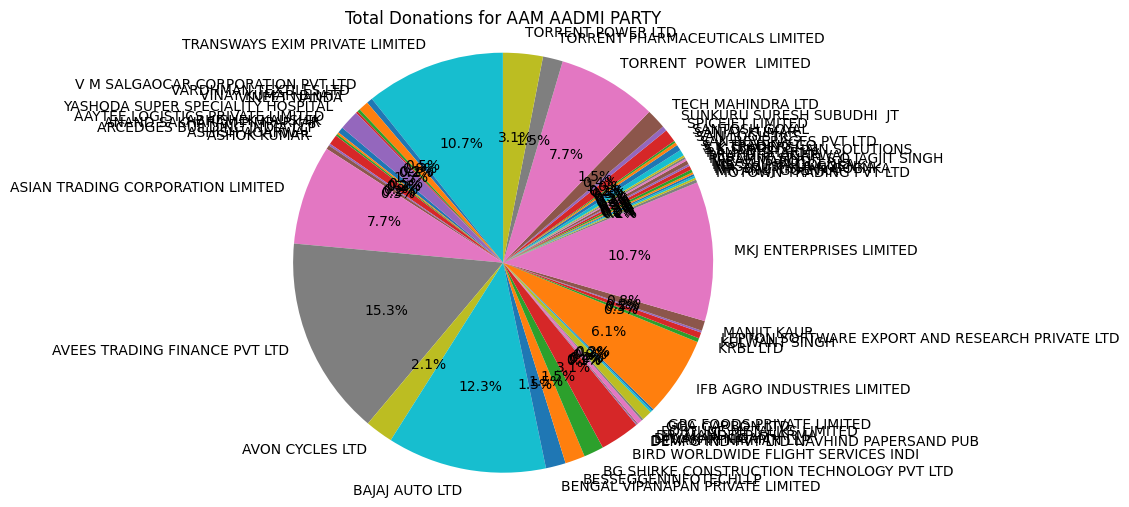

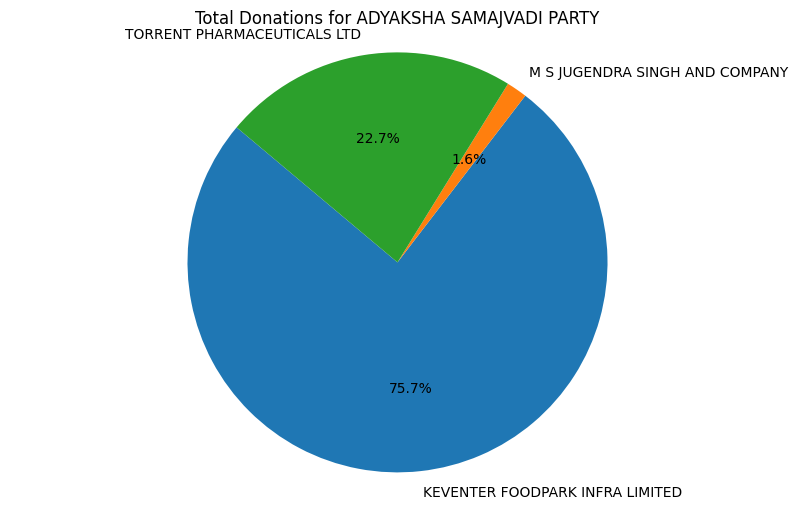

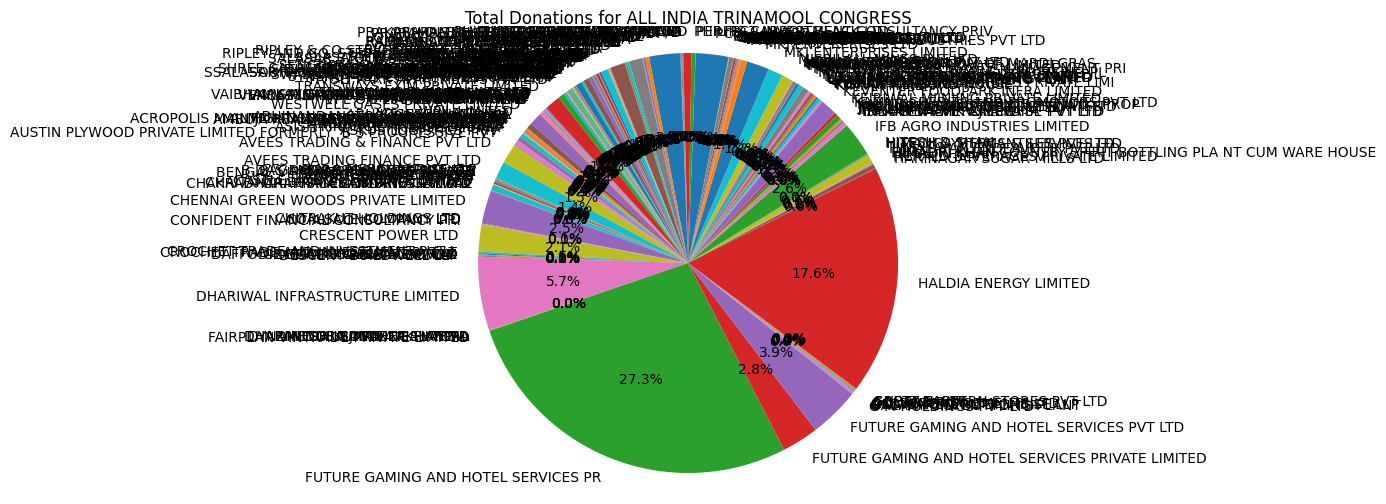

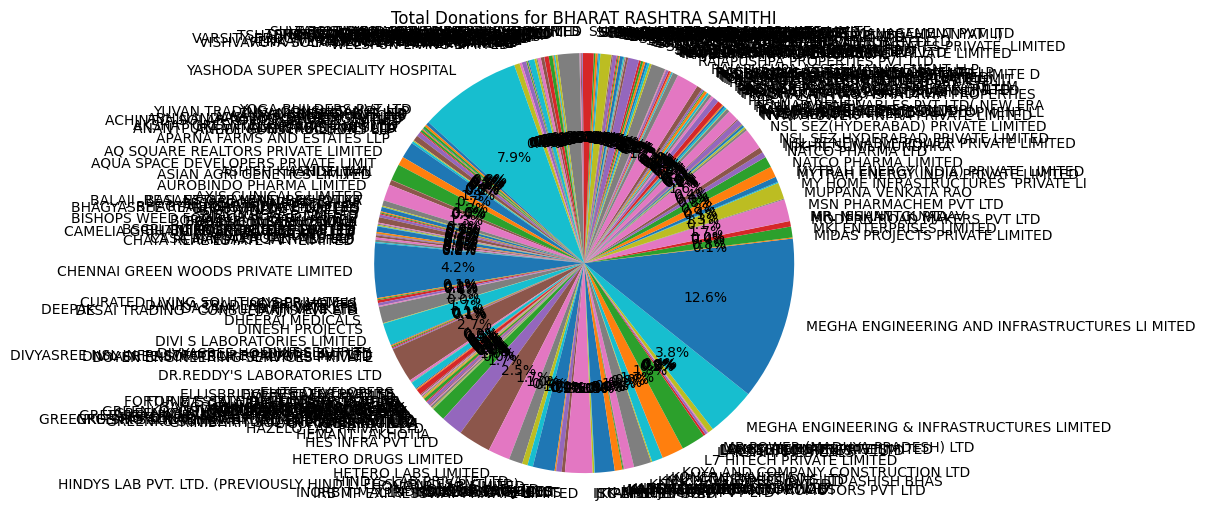

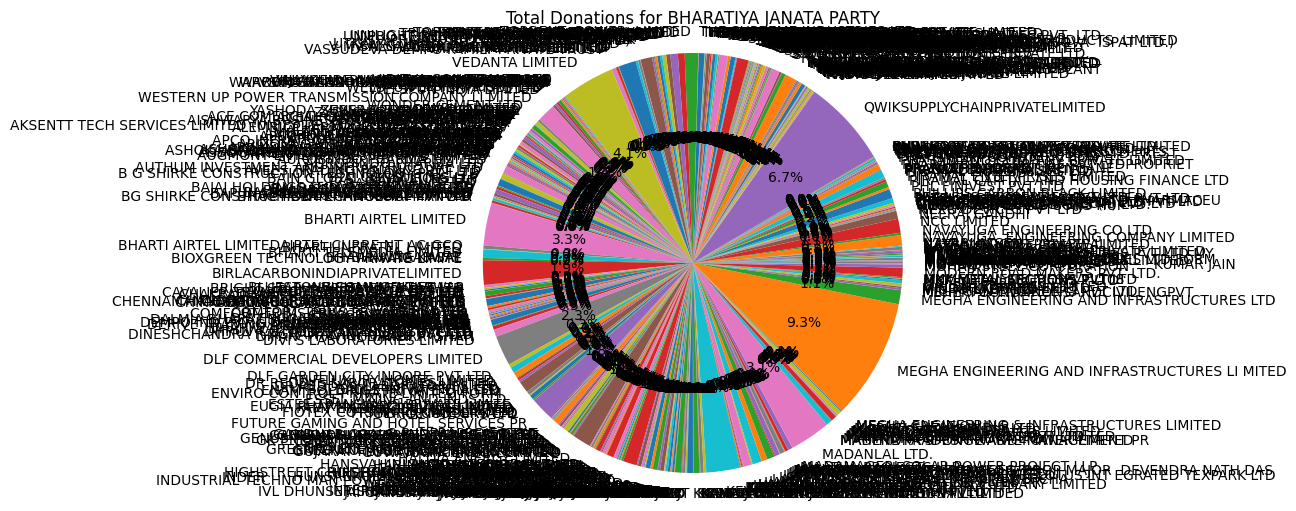

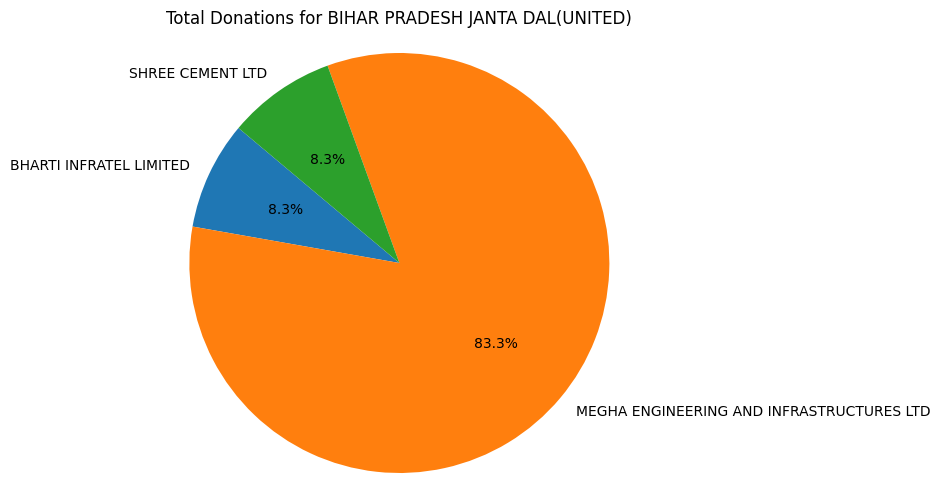

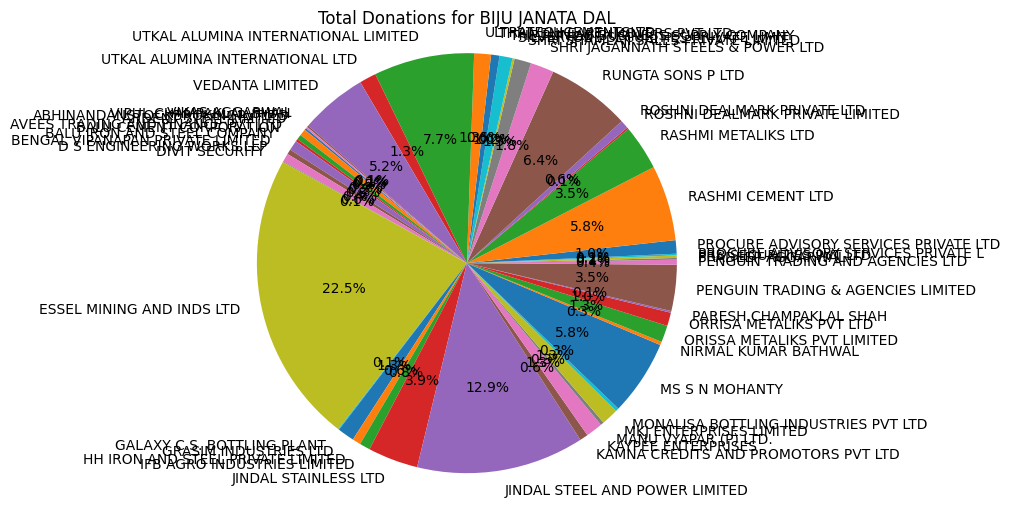

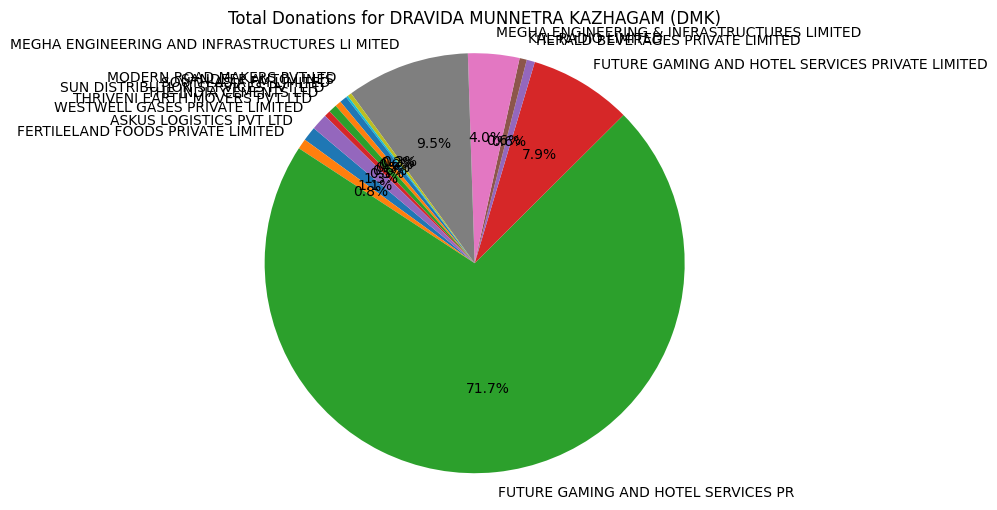

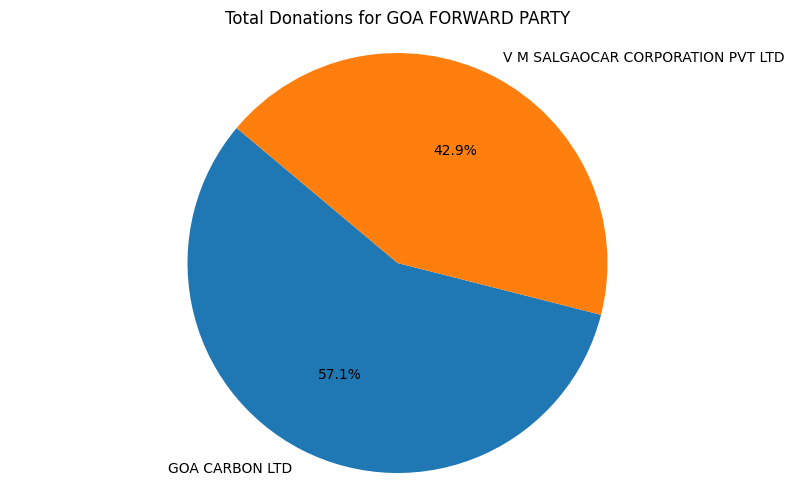

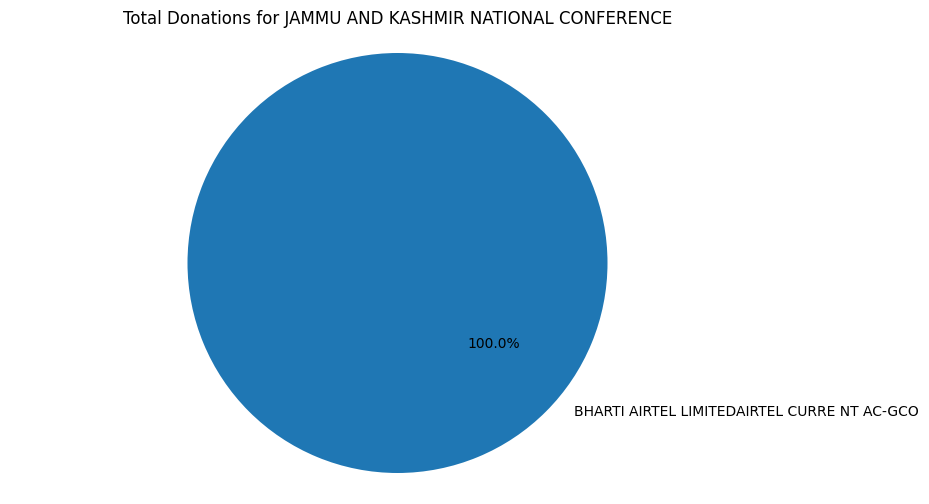

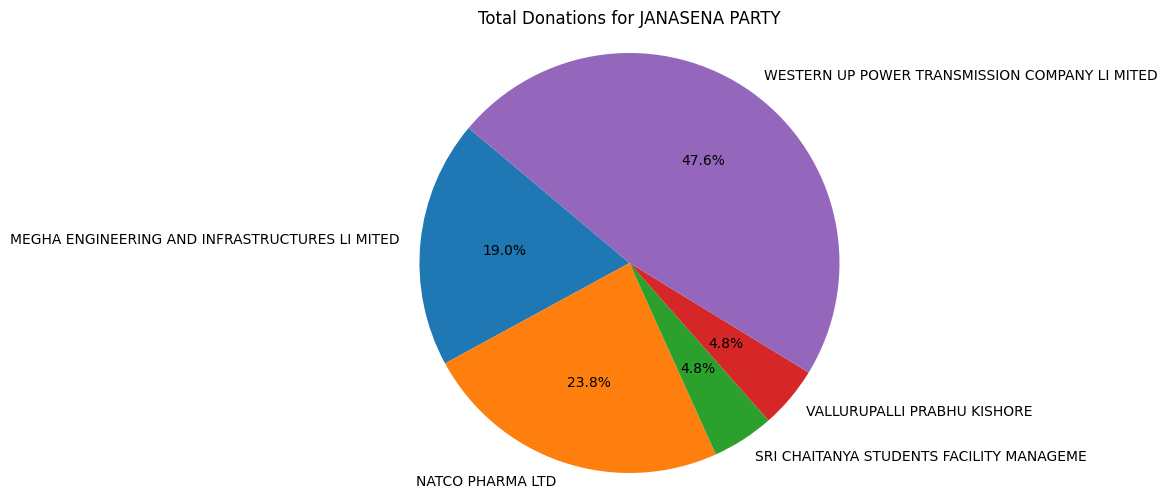

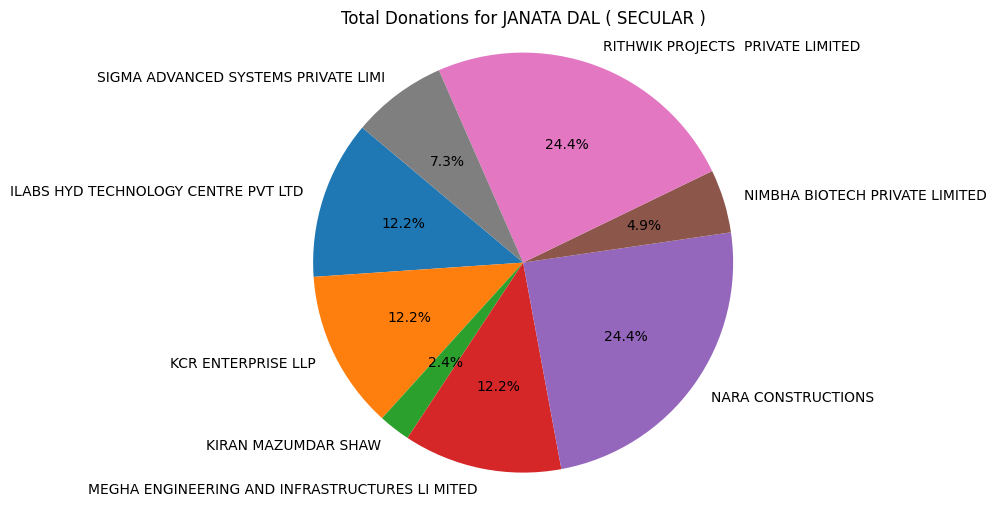

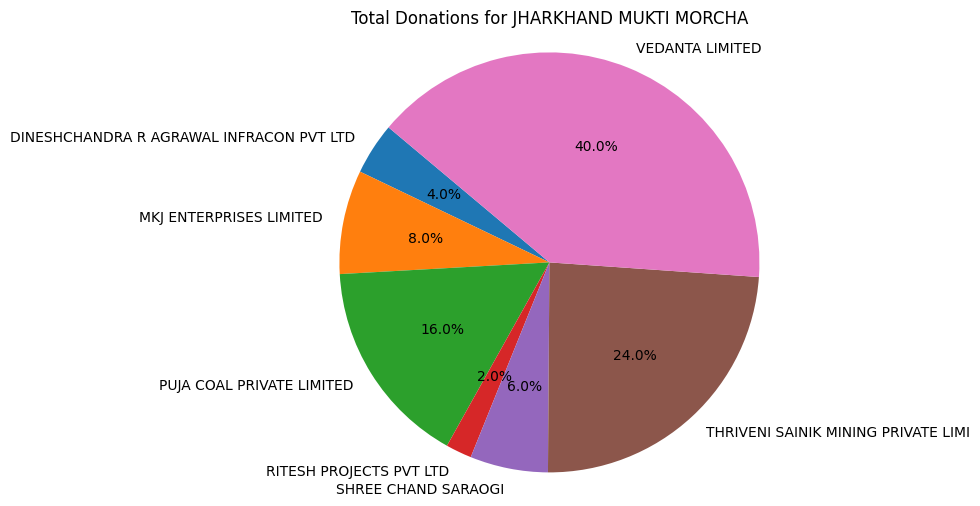

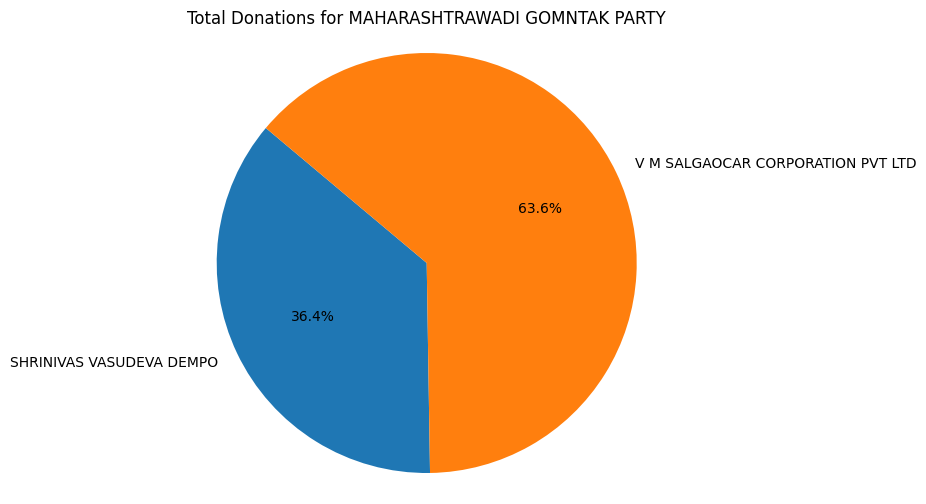

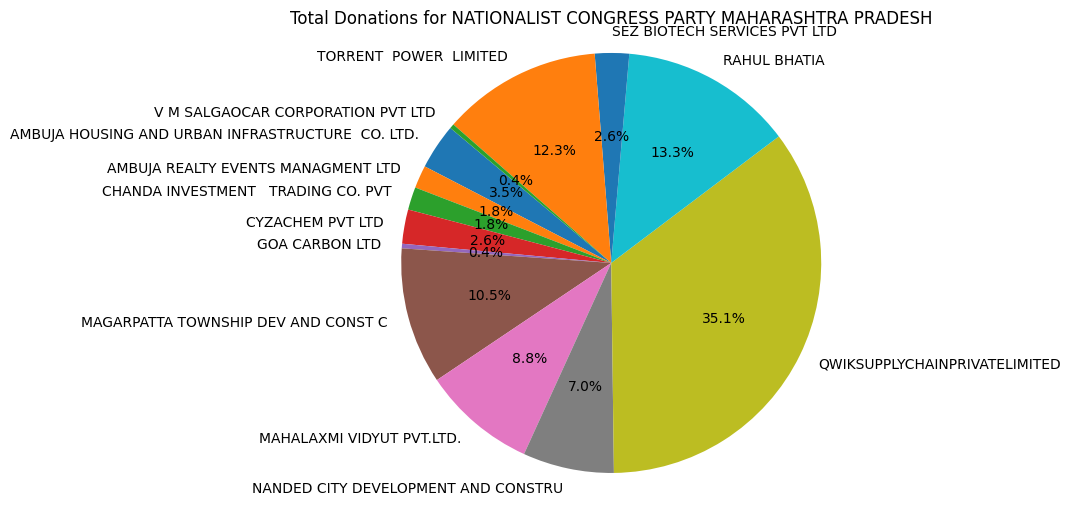

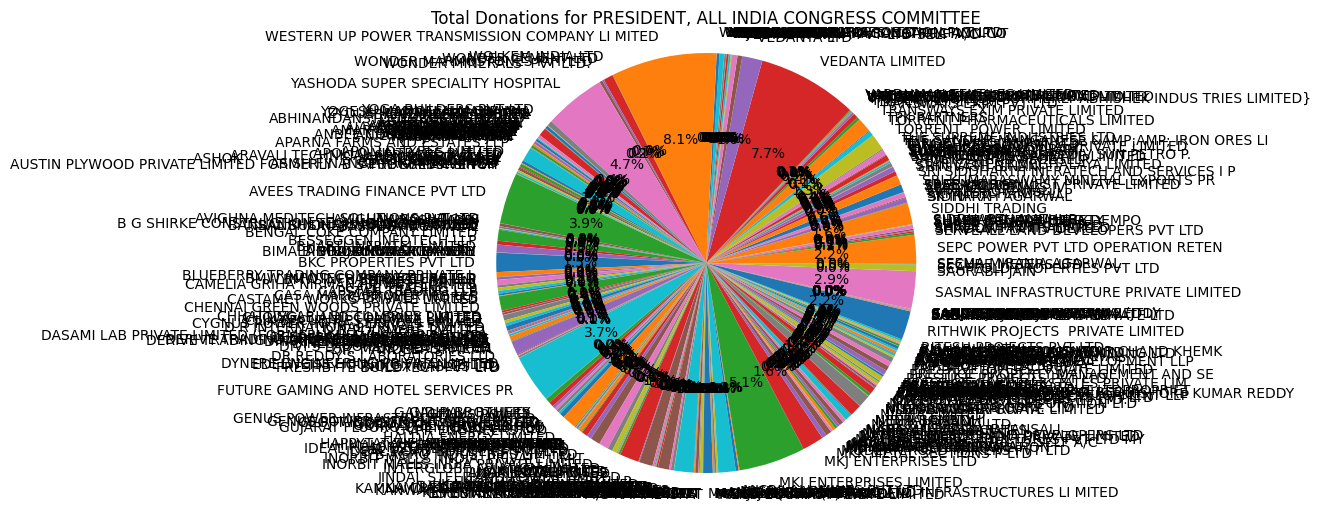

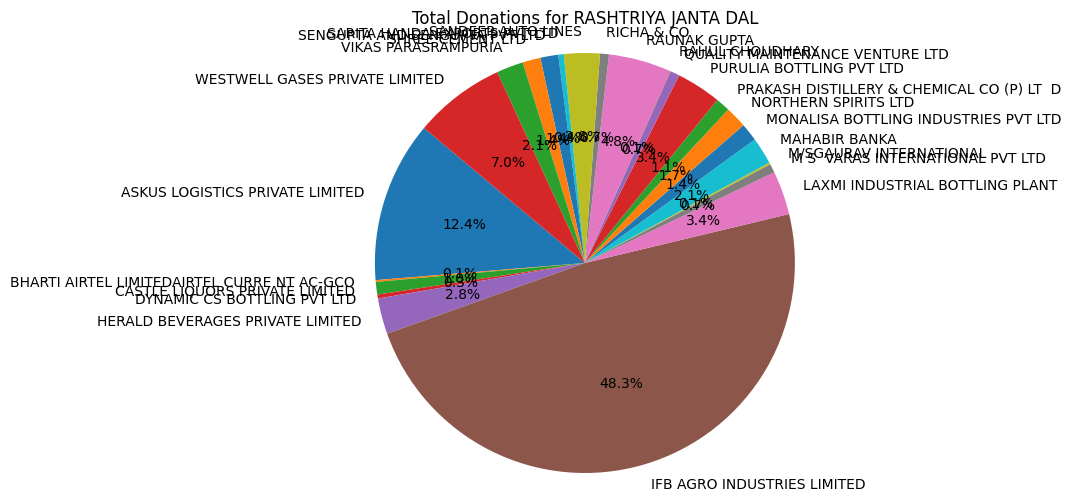

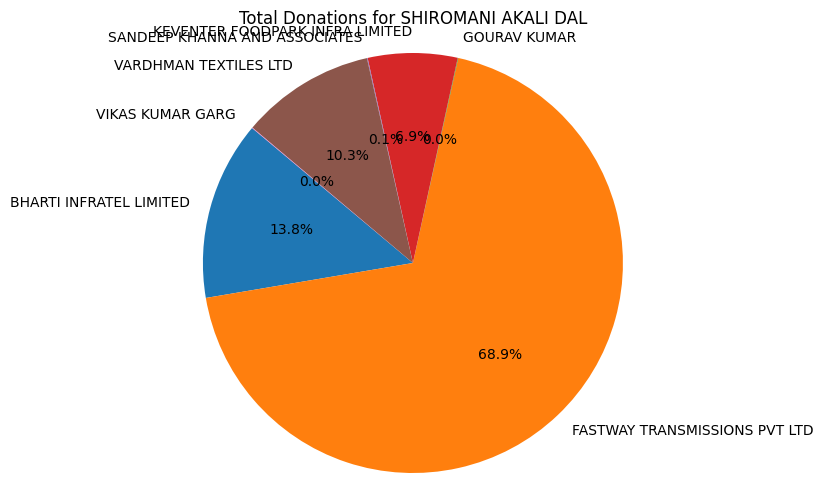

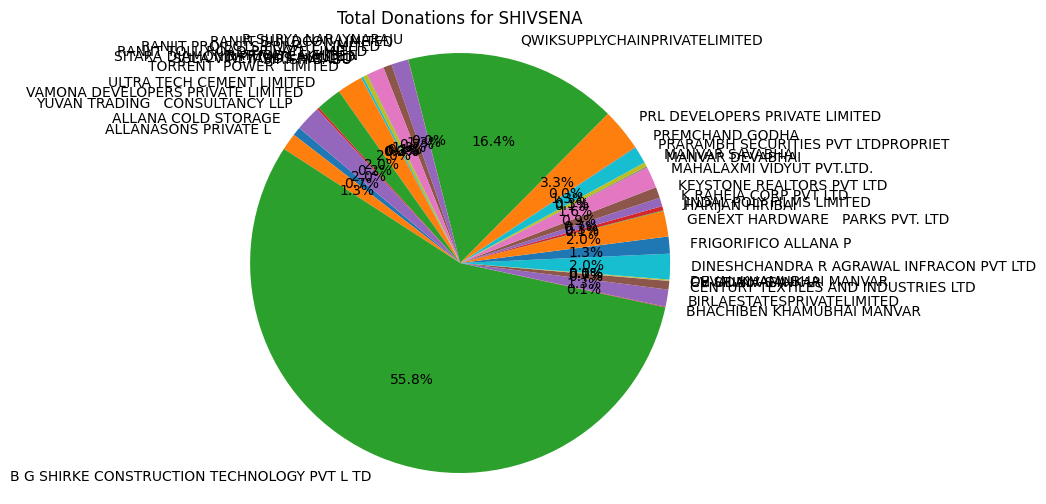

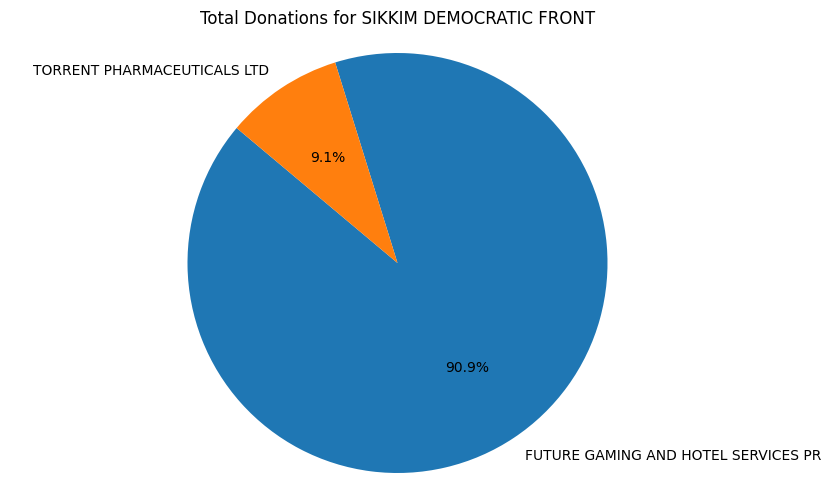

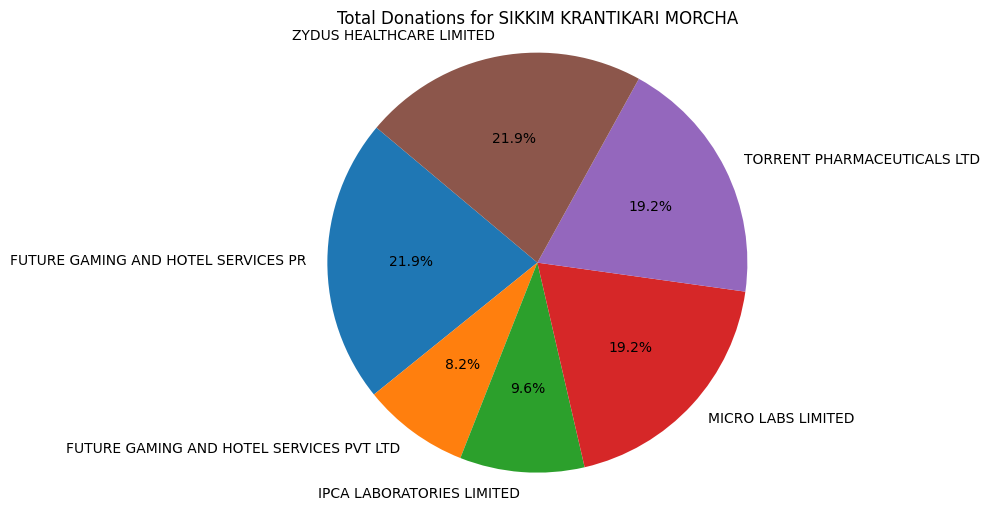

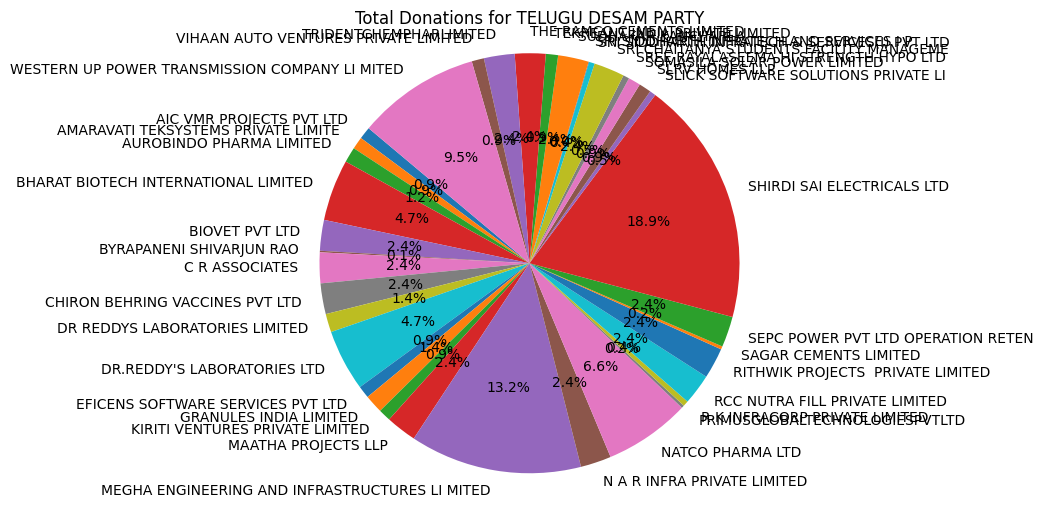

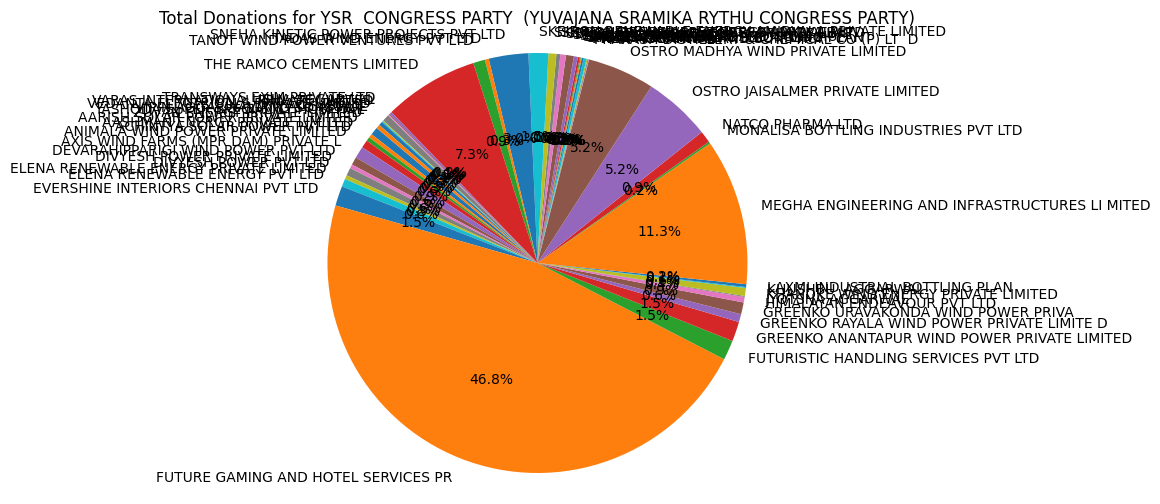

In [63]:

import matplotlib.pyplot as plt
import seaborn as sns

parties = result['Name of the Political Party'].unique()

for party in parties:
    party_data = result[result['Name of the Political Party'] == party]
    denomination_totals = party_data.groupby('Name of the Purchaser')['Denominations'].sum()
    plt.figure(figsize=(10, 6))
    plt.pie(denomination_totals, labels=denomination_totals.index, autopct='%1.1f%%', startangle=140)
    #plt.title('Total Denominations by Name of the Purchaser')
    plt.axis('equal')
    plt.title(f'Total Donations for {party}')
    plt.show()


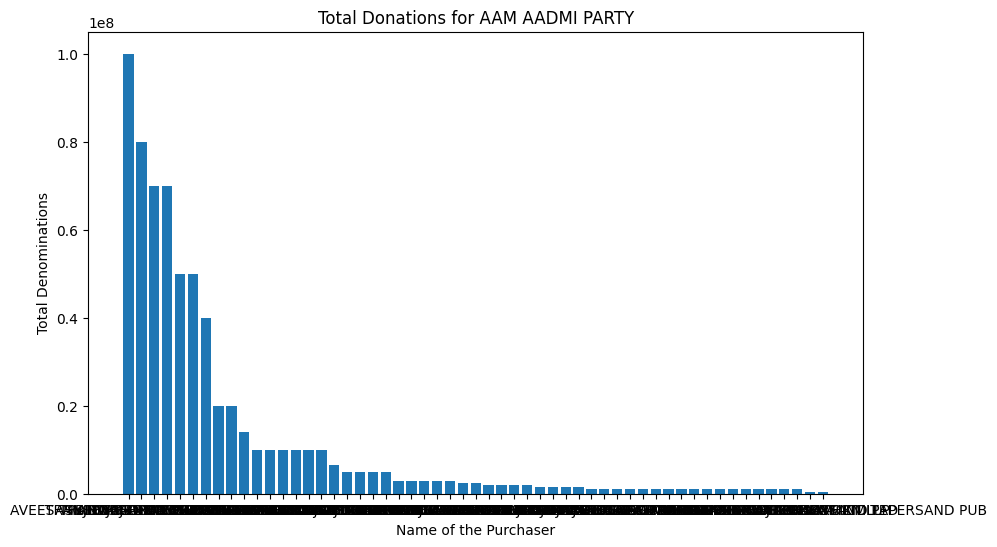

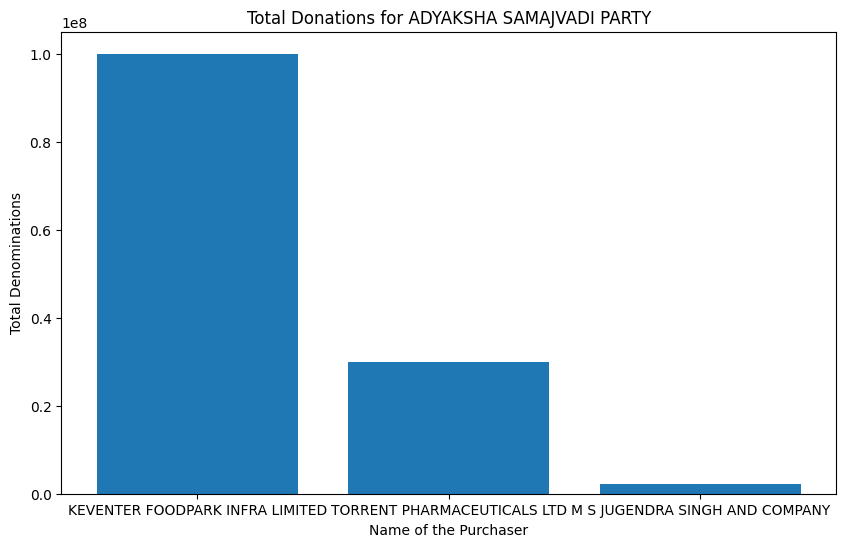

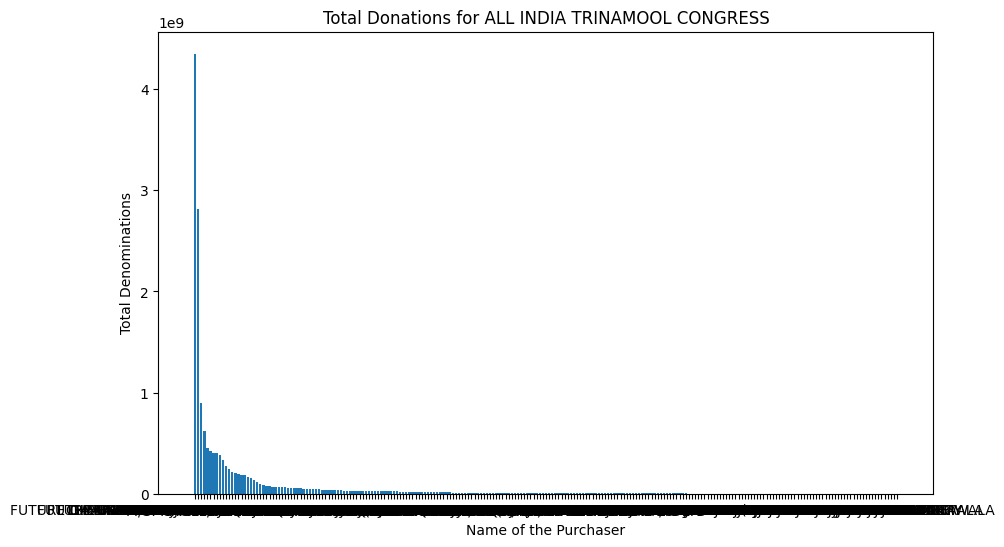

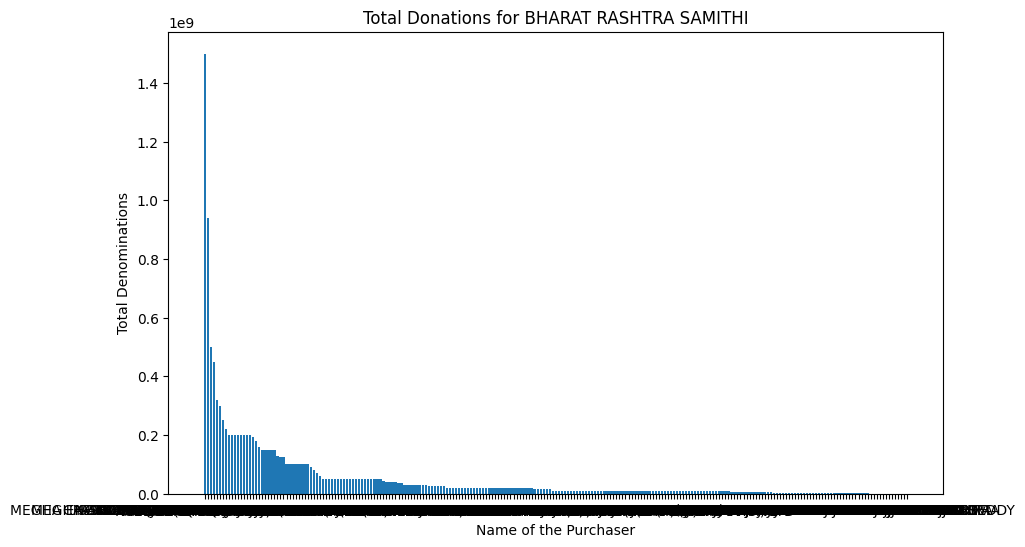

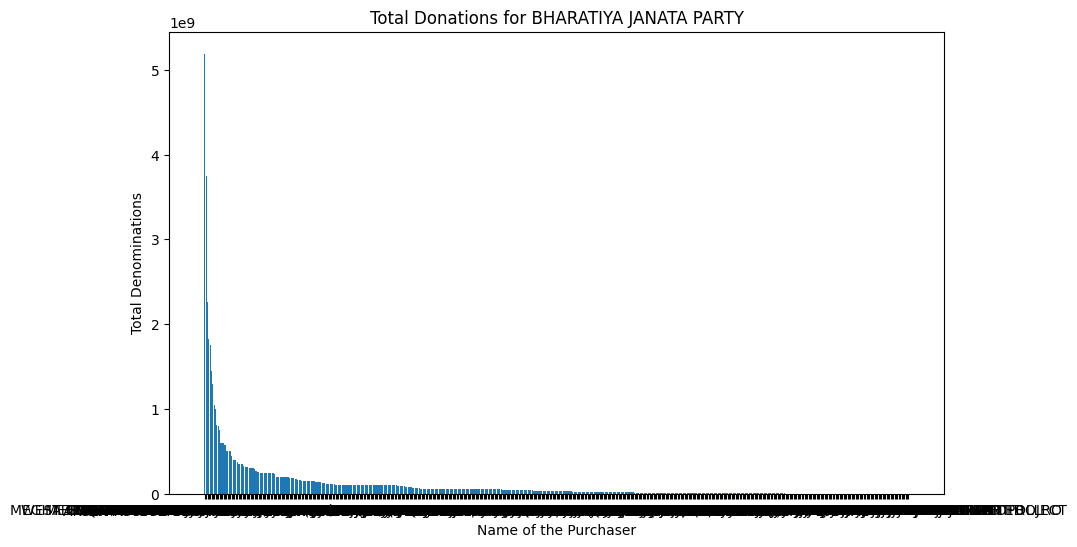

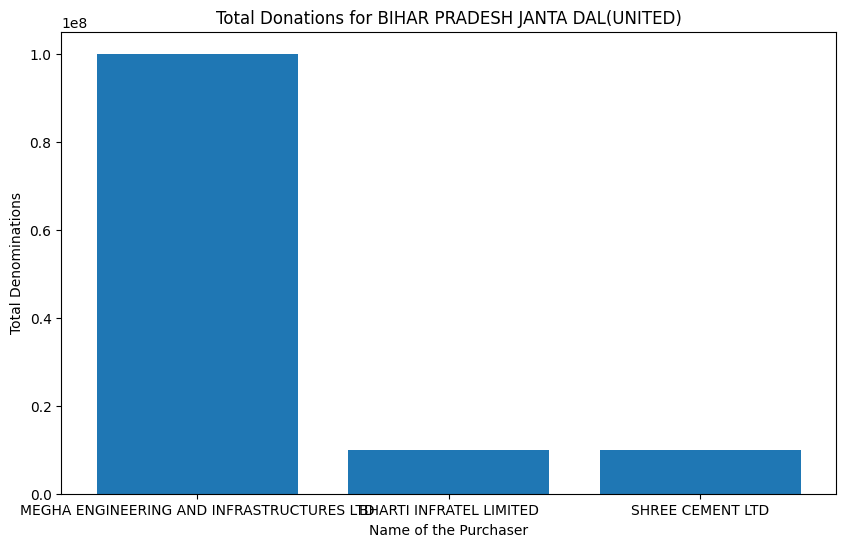

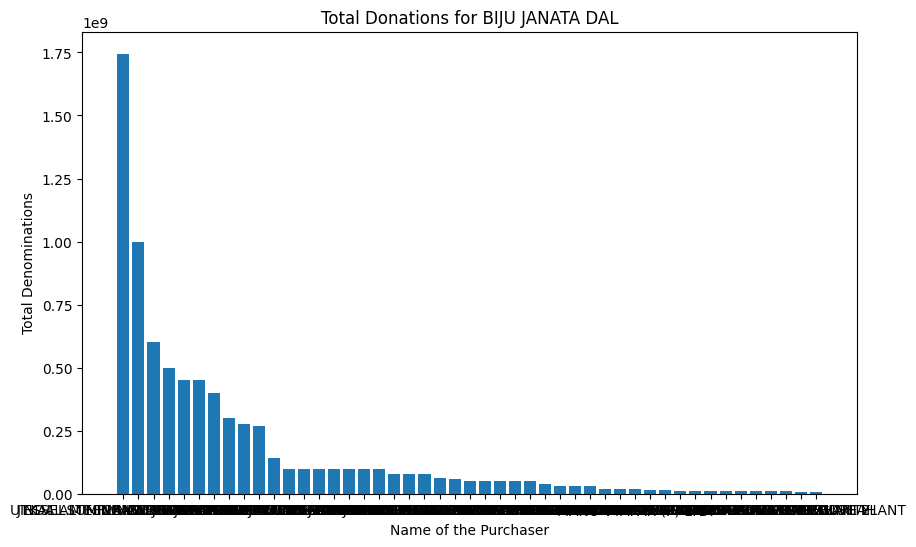

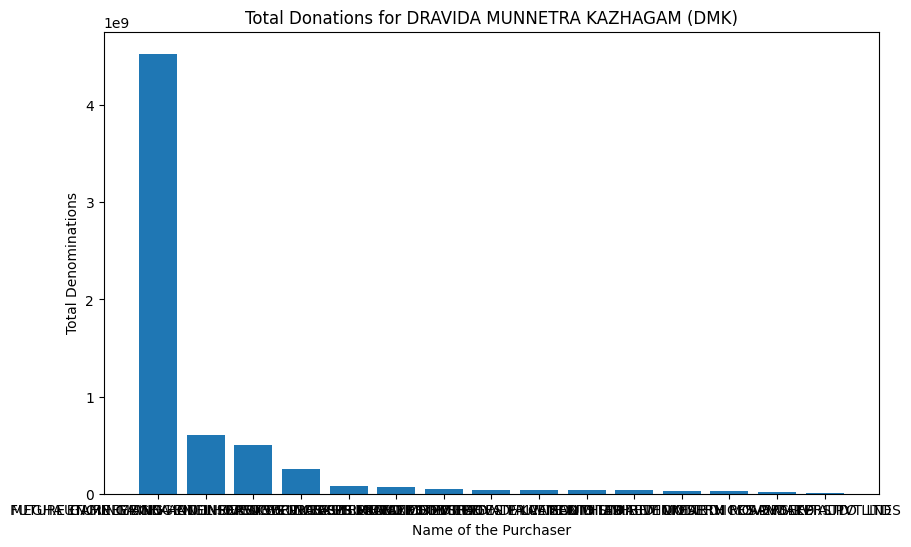

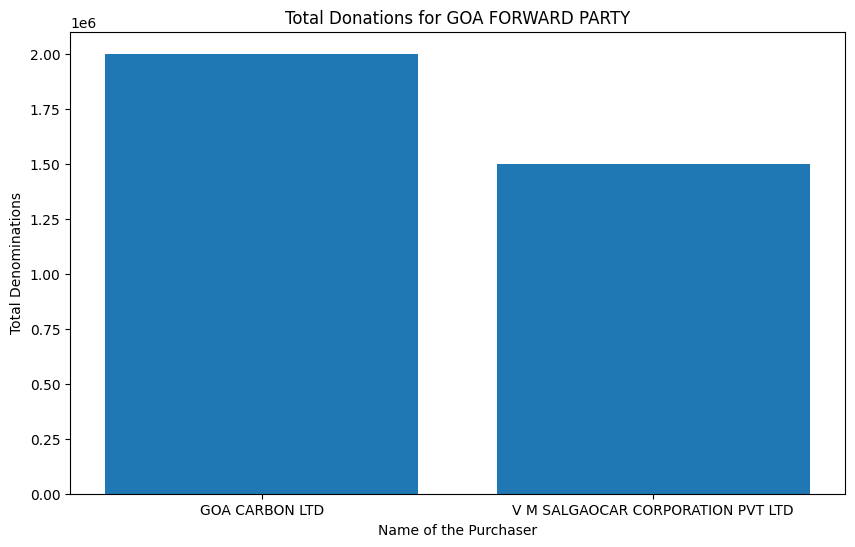

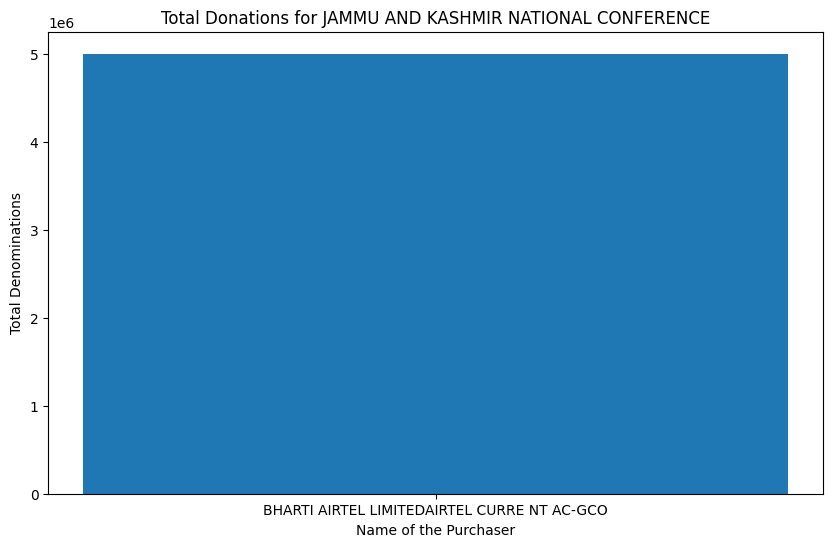

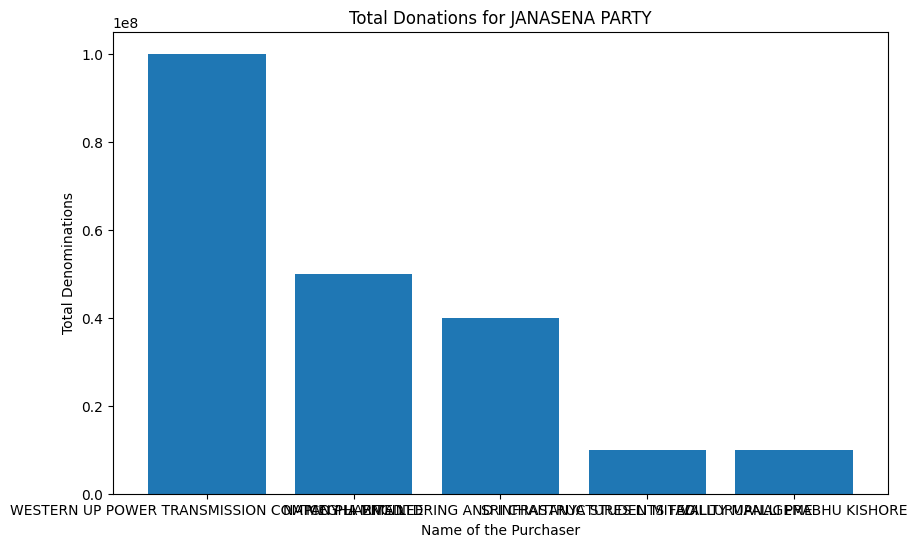

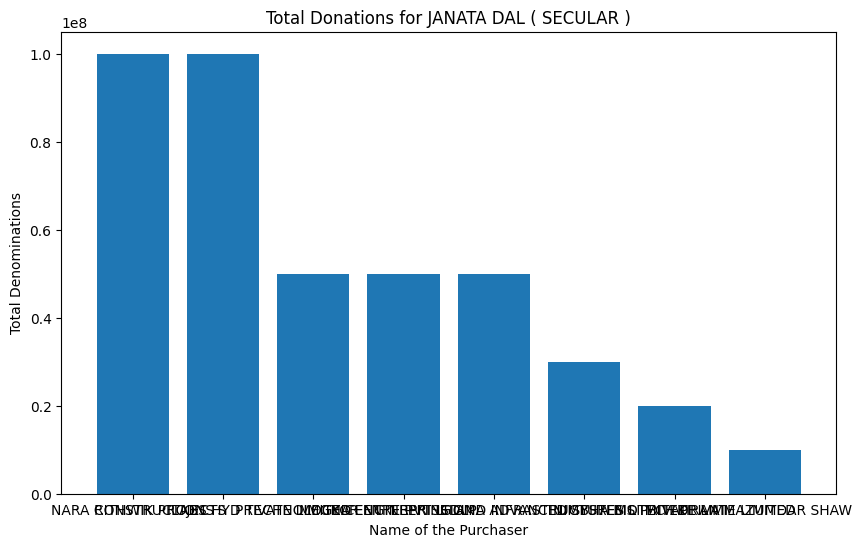

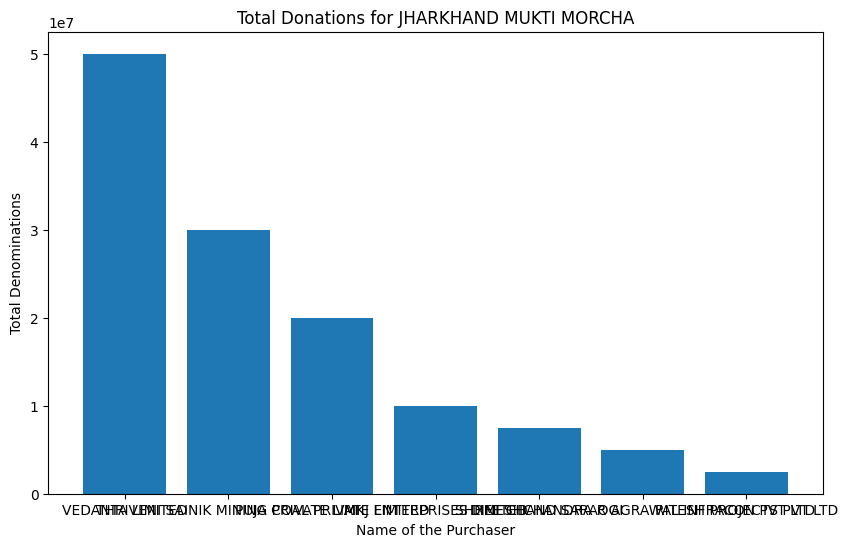

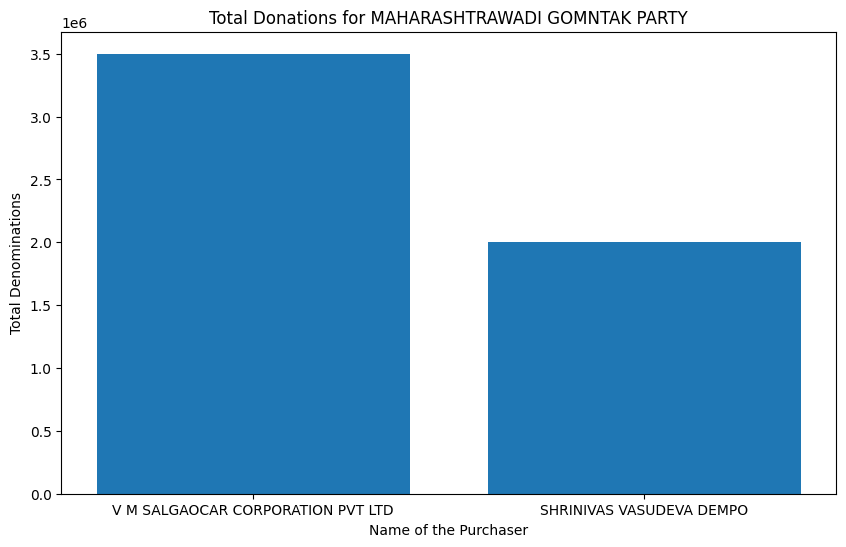

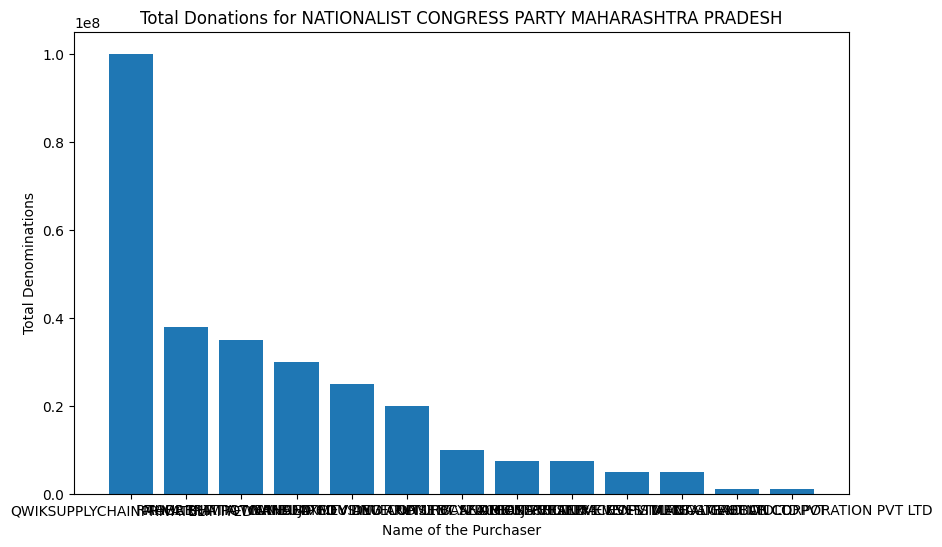

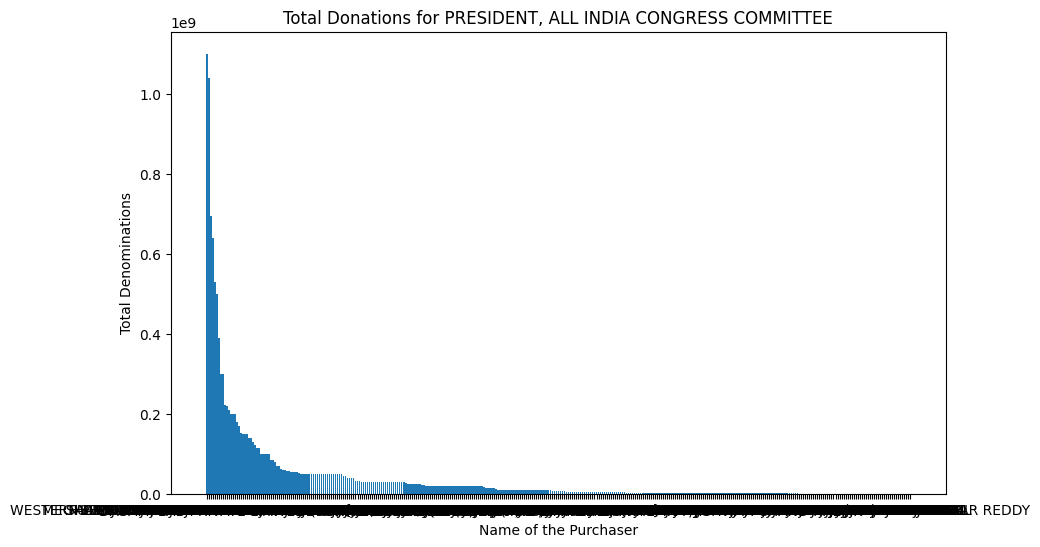

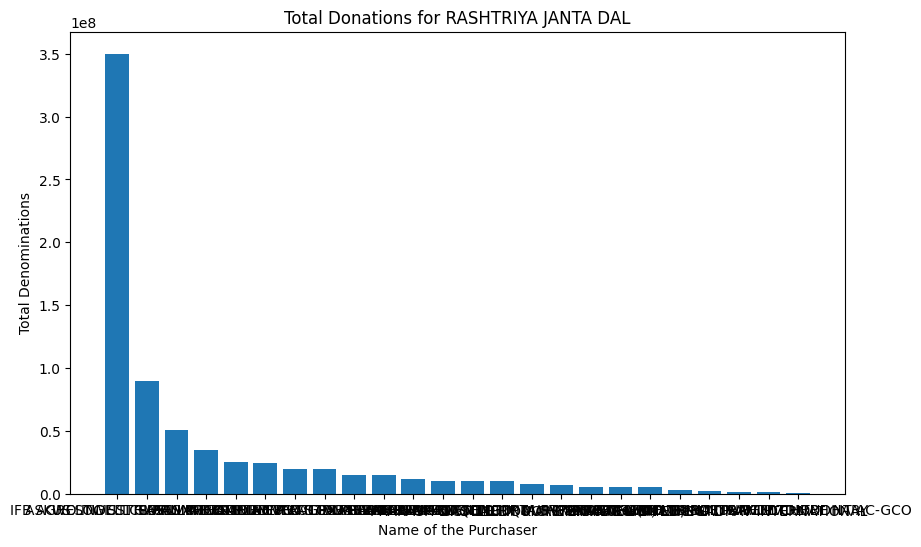

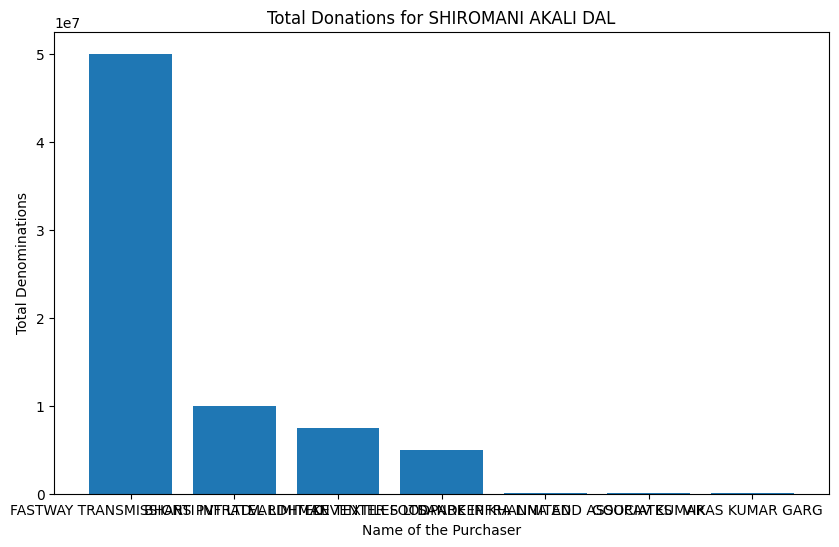

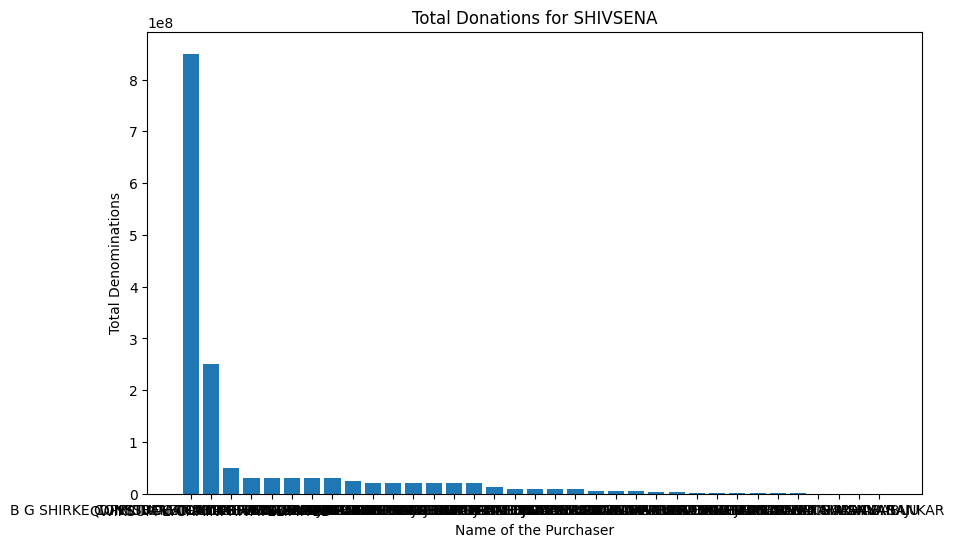

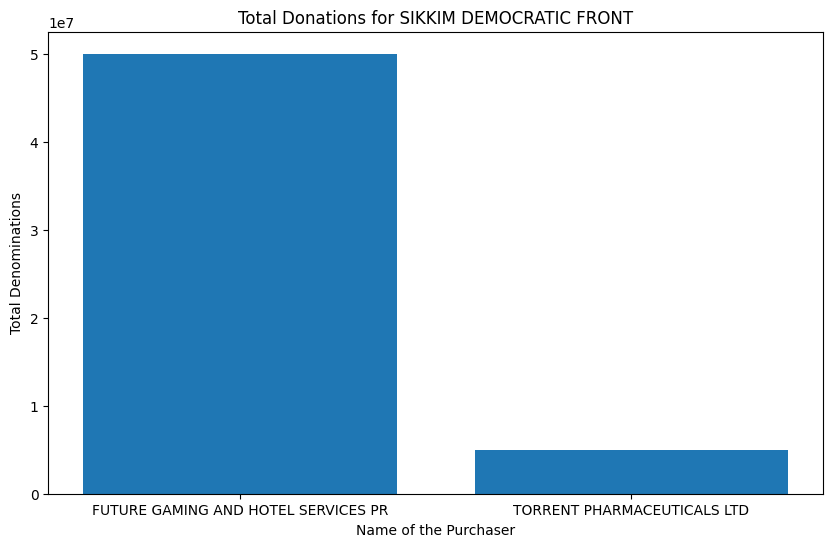

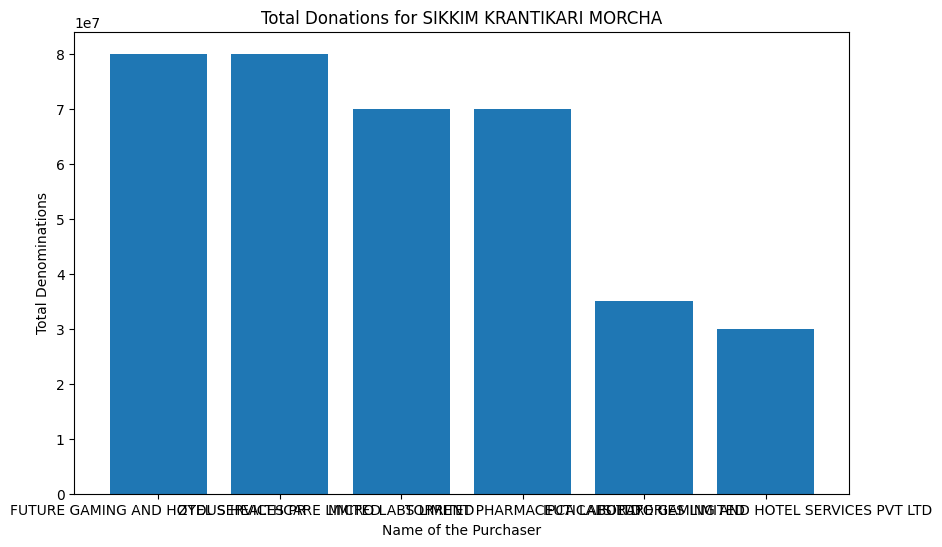

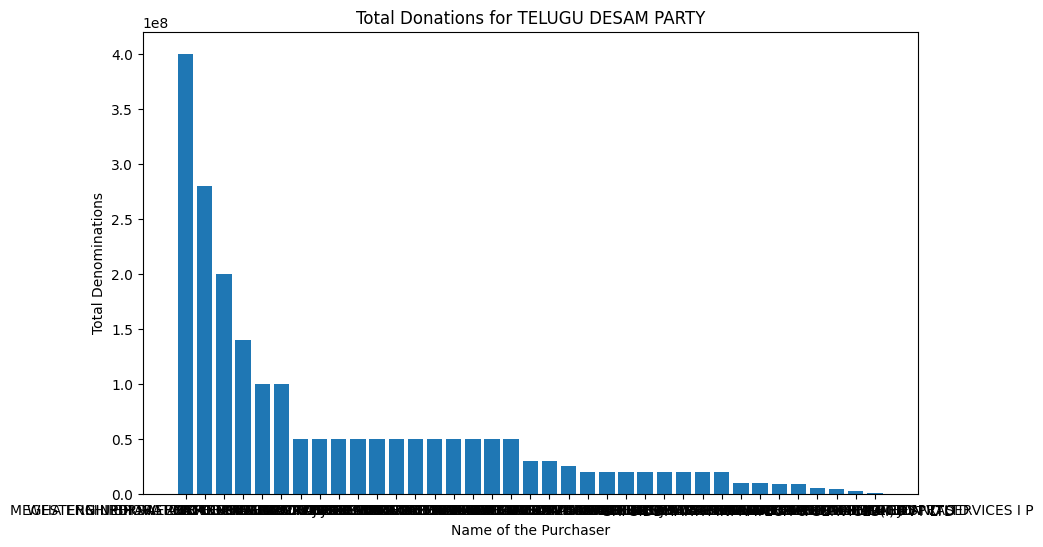

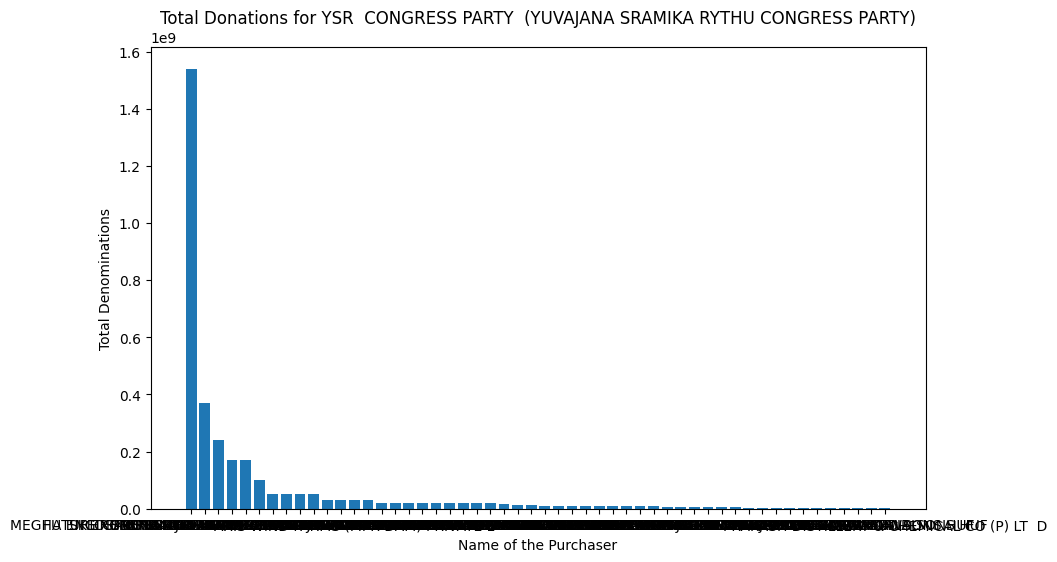

In [69]:
parties = result['Name of the Political Party'].unique()

for party in parties:
    party_data = result[result['Name of the Political Party'] == party]
    denomination_totals = party_data.groupby('Name of the Purchaser')['Denominations'].sum()
    plt.figure(figsize=(10, 6))
    plt.bar(denomination_totals.index, denomination_totals.values)
    plt.title('Total Denominations by Name of the Purchaser')
plt.xlabel('Name of the Purchaser')
plt.ylabel('Total Denominations')
    plt.title(f'Total Donations for {party}')
    plt.show()

In [73]:
import csv

for party in parties:
    party_data = result[result['Name of the Political Party'] == party]
    denomination_totals = party_data.groupby('Name of the Purchaser')['Denominations'].sum().sort_values(ascending=False)

    with open(f'{party}.csv', 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Name of the Purchaser', 'Total Denominations'])
        for purchaser, total in denomination_totals.items():
            writer.writerow([purchaser, total])